In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/kaggle/input/cleaned-data-tapazcars-feb12-mart13/cleaned data tapazcars feb12 - mart13.xlsx")

In [3]:
df

,Price,Car_name,Year,Location,Date
0,400,ZAZ 968M,1986,Bakı,2024-02-25
1,450,Daewoo Nexia,1996,Bakı,2024-03-12
2,600,BMW 318,1991,Bakı,2024-03-02
3,600,Renault 12 Toros,1999,Bakı,2024-03-11
4,600,LADA (VAZ) 2106,1998,Cəlilabad,2024-03-12
...,...,...,...,...,...
7530,96000,KIA Sorento,2023,Bakı,2024-02-27
7531,102300,Land Rover Range Rover,2014,Bakı,2024-03-10
7532,106250,Land Rover Range Rover,2017,Bakı,2024-02-29
7533,110000,Toyota Land Cruiser,2017,Şəmkir,2024-02-24


In [4]:
#Kolonların tipi, sayı haqqında məlumat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Price     7535 non-null   int64         
 1   Car_name  7535 non-null   object        
 2   Year      7535 non-null   int64         
 3   Location  7535 non-null   object        
 4   Date      7535 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 294.5+ KB


In [5]:
#Aylıq nə qədər elan yerləşdirilib
df['Month'] = df['Date'].dt.month
df.groupby('Month')['Price'].count()

Month
2    3378
3    4157
Name: Price, dtype: int64

Text(0, 0.5, 'Month')

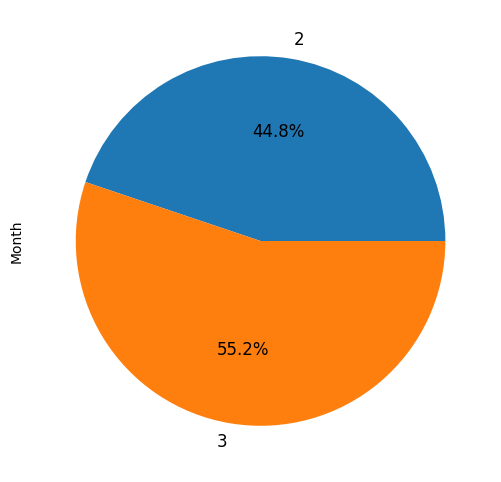

In [6]:
#Aylıq nə qədər elan yerləşdirilib faizlə vizualizasiya (2ci və 3cü ay) 
df.groupby('Month')['Price'].count().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%' , fontsize=12)
plt.ylabel('Month')

In [7]:
#Kolonun adını dəyişmək
df.rename(columns = {'Year':'year_of_car'},inplace=True)

In [8]:
#İlinə görə satışda olan maşınların sayı
count_of_cars_by_years = df.groupby('year_of_car')['Car_name'].count().sort_values(ascending=False).head(10)
print(count_of_cars_by_years)

year_of_car
2006    412
2008    401
2007    394
1998    374
1997    306
1999    306
2014    303
2005    291
2013    279
2012    257
Name: Car_name, dtype: int64


Text(0, 0.5, 'count')

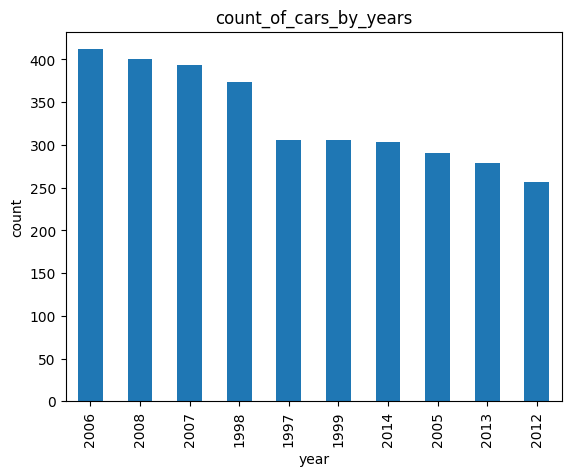

In [9]:
#İlinə görə satışda olan maşınların saylarının visuallaşdırılması
count_of_cars_by_years.plot(kind = 'bar')
plt.title('count_of_cars_by_years')
plt.xlabel('year')
plt.ylabel('count')

In [10]:
# 10 ən bahalı maşın
df[['Car_name','Price']].sort_values('Price',ascending = False).head(10)

,Car_name,Price
7534,Mercedes GLC 300,130000
7533,Toyota Land Cruiser,110000
7532,Land Rover Range Rover,106250
7531,Land Rover Range Rover,102300
7530,KIA Sorento,96000
7529,Land Rover Range Rover,96000
7528,Mercedes S 500,95000
7527,Mercedes GL 450,93000
7526,Lexus NX 300H,89250
7525,Land Rover Discovery,85000


In [11]:
# korelyasiya il və qiymət
# iki dəyişən arasında korelyasiya positivdir amma qədər də güclü deyil -  0.58
df[['year_of_car' , 'Price']].corr()

,year_of_car,Price
year_of_car,1.000000,0.585571
Price,0.585571,1.000000


<Axes: xlabel='year_of_car', ylabel='Price'>

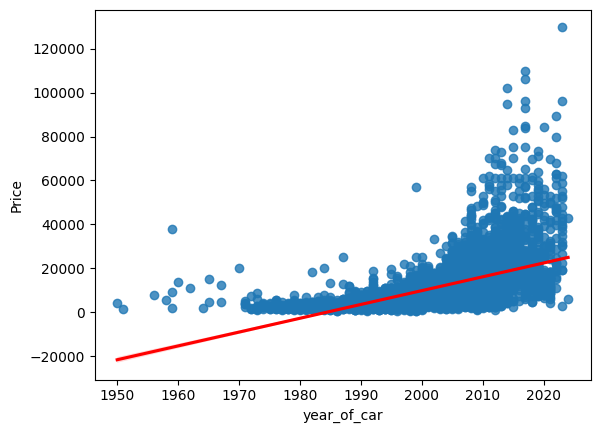

In [12]:
#scatter plot vasitəsilə vizualizasiya
sns.regplot(x = 'year_of_car' , y = 'Price' , line_kws={'color': 'red'}, data = df)

In [13]:
#saya görə ən çox elan yerləşdirən regionlar
location_counts = df.groupby('Location')['Car_name'].count()
filtered_locations = location_counts[location_counts > 50].sort_values(ascending=False)
print(filtered_locations)

Location
Bakı          4723
Sumqayıt       395
Gəncə          362
Xaçmaz         149
Quba           128
Zaqatala        90
Mingəçevir      86
Şəki            84
Lənkəran        83
Şirvan          81
Bərdə           72
Qusar           68
Masallı         61
Cəlilabad       56
Xırdalan        53
Sabirabad       52
Salyan          52
Name: Car_name, dtype: int64


Text(0.5, 0, 'Location')

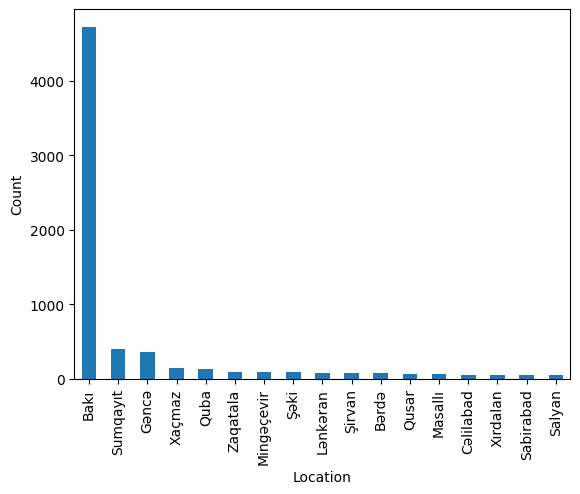

In [14]:
#saya görə ən çox elan yerləşdirən regionlar vizuallaşdırılması
filtered_locations.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Location')

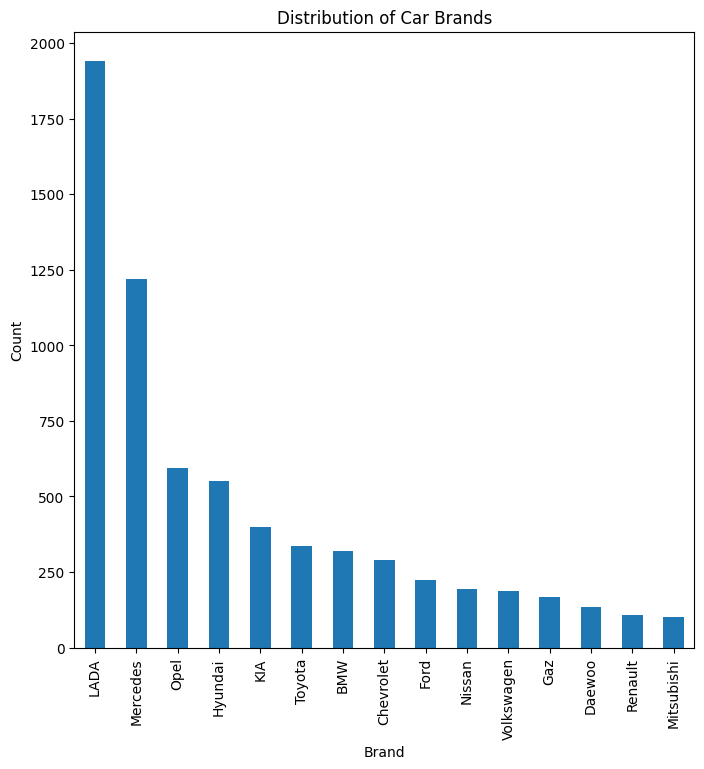

In [15]:
# Yeni kolon yaradıb ən çox elanda olan avtomobillərin chartının hazırlanması
df['Brand'] = df['Car_name'].str.split(' ').str[0]
brand_counts = df['Brand'].value_counts().head(15)
plt.figure(figsize=(8, 8))
brand_counts.plot(kind='bar')
plt.title('Distribution of Car Brands')
plt.ylabel('Count')
plt.show()